In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

nodes = []
vertex_pairs = []
labels = {}
nodes_dict = {}
orphan_nodes=[]
edges={}
matrix = []

In [2]:
def enter_nodes():
    n = int(input("Enter the amount of nodes you wish to add: "))
    for i in range(n):
        node = "v" + str(i+1)
        nodes.append(node)
    print("\nThe following vertices have been created for this graph: ")
    print(nodes)
    print("\n")
    return nodes
    
def enter_single_edge_per_node(nodes, vertex_pairs):   
    for i in range(len(nodes)):
        v2 = input("Enter the adjacent vertex for node " + nodes[i] +": ")
        while v2 not in nodes:
            print("Invalid vertex. This vertex was not added.")
            v2 = input("Enter the adjacent vertex for node " + nodes[i] +": ")        
        vertex_pair = nodes[i],v2
        vertex_pairs.append(vertex_pair)
    return vertex_pairs
    
def enter_multiple_edges_per_node(nodes, nodes_dict):
    for i in range(len(nodes)):
        v2 = ''
        adj_vert =[]
        while(v2!='\\'):
            v2 = input("Enter adjacent vertex for " +nodes[i]+" or type \ for next vertex: ")
            if v2 in nodes:
                adj_vert.append(v2)
            elif v2!='\\':
                print("Invalid vertex. This vertex was not added.")
                v2 = input("Enter adjacent vertex for " +nodes[i]+" or type \ for next vertex: ")
            nodes_dict.update({nodes[i]:adj_vert})
    return nodes_dict

def create_vertex_pair(nodes, nodes_dict,vertex_pairs):
    for n in nodes:
        orphan_nodes=[]
        temp = nodes_dict.get(n)
        if(len(temp)==0):
            orphan_nodes.append(n)
        for i in range(0, len(temp)):
            v = temp[i]
            vertex_pair = n, v
            vertex_pairs.append(vertex_pair)
    return vertex_pairs, orphan_nodes
        
def create_graph(vertex_pairs, labels):
    graph = input("\nChoose G for Graph or D for Directed Graph: ")
    if(graph=='G') or (graph=='g'):
        G=nx.MultiGraph()
        G=G.to_undirected()
        color = "skyblue"
    elif(graph=='D') or (graph=='d'):
        G=nx.MultiDiGraph()
        color = "pink"
    else:
        print("Invalid selection. Defaulting to Graph.")
        G=nx.Graph()
 
    for i in range(0, len(vertex_pairs)):
        u, v = vertex_pairs[i]
        lbl='e'+str(i+1)
        G.add_edge(u,v, label=lbl)
        labels.update({vertex_pairs[i]:lbl})  
        edges.update({lbl:vertex_pairs[i]})  
   
    pos = nx.shell_layout(G)
    plt.figure()    
    nx.draw(G,pos,edge_color=color,width=1,linewidths=1,node_size=800,node_color=color, alpha=0.9, labels={node:node for node in G.nodes()})
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_color='black', font_size=12, label_pos=.3)
    plt.axis('off')
    plt.show()
    return G

def create_adj_matrix(graph):
    print("\nAdjacency Matrix: ")
    A=nx.adjacency_matrix(graph)
    return A.todense()

def create_adj_matrix_path_2(graph):
    print("\nAdjacency Matrix with paths of length 2: ")
    A=nx.adjacency_matrix(graph)
    B = A.todense()
    C = np.dot(B,B)
    # create function to allow for other path lengthts
    return C

def print_graph_stats(graph,labels):
    print("\nGraph Statistics")
    print("------------------")
    print("Number of vertices:" , len(graph))
    print("Number of edges:" , len(graph.edges()))
    print("Vertices:", list(graph.nodes())) #data = True for metadata
    print("Vertices with self loops:", list(graph.nodes_with_selfloops()))
    #print("Edges: ", list(G.edges))
    print("Edge | Vertices")
    for keys, values in edges.items():
        print(' ', keys, "|",'(%s)' % ', '.join(map(str, values)))
        
def print_matrix(graph):
    if type(graph)==nx.classes.multidigraph.MultiDiGraph:
        color="Pastel1" #"RdPu"
    else:
        color = "Blues"
    A = nx.to_numpy_matrix(graph)
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax1.imshow(A, cmap=color) #, interpolation='nearest' cmap=cm.Greys_r  "Set3"
    ax1.set_xticks(np.arange(0,len(nodes), step=1))
    ax1.set_xticklabels(nodes)
    ax1.xaxis.tick_top()
    ax1.xaxis.set_label_position("top")
    plt.yticks(np.arange(0,len(nodes), step=1),nodes)
    plt.show()
    
def print_path(graph,start,end):
    print("\nPaths from", start, "to", end, ":")
    for path in nx.all_simple_paths(graph, source=start, target=end):
        if path==[]:
            print("No path found")
        else:
            print(path)
            
def print_path_of_length(graph,start,end,length):
    paths = list(nx.all_simple_paths(graph, source=start, target=end))
    x=0
    num = len(paths)
    for i in range(0, num):
        if (len(paths[i])==length+1):
            print(paths[i])
            x=1
    if(x==0):
        print("No path of length",length,"between", start,"and",end)    
    
def get_vertices_for_edge(edge):
    return edges.get(edge)

def get_adjacent_vertices(v):
    return list(G.neighbors(v))

def find_cycle(g, v):
    print("\nCycle for", v, ":")
    for path in nx.all_simple_paths(g, source=v, target=v):
        if path==[]:
            print("No cycle found")
        else:
            print(path)
    
def create_graph_from_matrix():
    R = int(input("Must be a square matrix Enter the number of rows or columns:")) 
    C = R
    print("Enter the entries in a single line (separated by space): ") 
    entries = list(map(int, input().split())) 
    matrix = np.array(entries).reshape(R, C) 
    print(matrix)
    nodes = []
    for i in range(0,R):
        node='v'+str(i+1)
        nodes.append(node)        
     #to be implemented   

In [3]:
def main(G):
    more = 'y'
    while more !='\\':
        print("\n-----------------------------------" )
        print("Select from the following options: " )
        print("-----------------------------------\n" )
        print("Press A to find adjacent vertices for a given pair of vertices.")
        #print("Press C to find a cycle for a given vertex.")
        print("Press E to find the edges for a given pair of vertices.")
        print("Press G to draw the graph.")
        print("Press J to print the Adjacency Matrix.")
        print("Press J2 for a matrix with all paths of length 2.")
        print("Press L to find all paths of a given length.")    
        print("Press M to print a visual representation of the matrix.")
        print("Press P to find all the paths between 2 given vertices (vertices not repeated).")
        print("Press S to get statistics for your graph.")
        print("Press V to find the vertices for a given edge.")
        
        choice = input("Make your selection: ")
    
        if choice.lower() == 'v':
            e = input("\nPlease enter the edge you would like to find the vertices for: ")
            if e not in edges:
                print("This is not a valid edge.")
            else:
                print("Edges for", e , "are: " , get_vertices_for_edge(e))
        elif choice.lower() == 'a':
            v = input("\nPlease enter the vertex you would like to find the adjacent vertices for: ")
            if v not in nodes:
                print("This is not a valid vertex.")
            else:
                print("Adjacent vertices for", v, "are: ", get_adjacent_vertices(v))
        elif choice.lower() == 'e':
            v1 = input("\nPlease enter the first vertex you would like to find the edges for: ")
            v2 = input("Please enter the second vertex you would like to find the edges for: ")
            if v1 not in nodes or v2 not in nodes:
                print("Invalid entry. One or more of the vertices you entered is not in the graph.")
            else:
                c = G.get_edge_data(v1,v2)
                try:
                    e = c.get(0).get('label')
                    print("Edge label for", v1, "and" , v2, "is:", e)
                except AttributeError:
                    print("There is no edge between", v1, "and", v2)
        elif choice.lower() == 's':
            print_graph_stats(G,labels)
        elif choice.lower() == 'j':
            print(create_adj_matrix(G))
        elif choice.lower() == 'j2':
            print(create_adj_matrix_path_2(G))
        elif choice.lower() == 'l':
            v1 = input("\nPlease enter the starting vertex: ")
            v2 = input("Please enter the ending vertex: ")
            l = int(input("Please enter the path length: "))        
            print_path_of_length(G,v1,v2,l)        
        elif choice.lower() == 'm':
            print_matrix(G)
        elif choice.lower() == 'g':
            G = create_graph(vertex_pairs, labels)
            plt.show()
        elif choice.lower() == 'p':
            v1 = input("\nPlease enter the starting vertex: ")
            v2 = input("Please enter the ending vertex: ")
            print_path(G,v1,v2)
        elif choice.lower() == 'c':
            v = input("\nPlease enter the vertex for the cycle in question: ")
            find_cycle(G,v)
        else:
            print("Invalid Selection.") 
            choice = input("Make your selection: ")
            
        more = input("\n--------Press any key to continue or type \ to quit----------  ")
    
    print("\nExiting Program.........\n\n")

In [4]:
print("-------------------------")
print("GRAPH ANALYSIS PROGRAM ")
print("beta version")
print("-------------------------\n")

nodes = enter_nodes()
nodes_dict = enter_multiple_edges_per_node(nodes, nodes_dict)
vertex_pairs, orphan_nodes = create_vertex_pair(nodes, nodes_dict,vertex_pairs)

-------------------------
GRAPH ANALYSIS PROGRAM 
beta version
-------------------------

Enter the amount of nodes you wish to add: 4

The following vertices have been created for this graph: 
['v1', 'v2', 'v3', 'v4']


Enter adjacent vertex for v1 or type \ for next vertex: v2
Enter adjacent vertex for v1 or type \ for next vertex: v3
Enter adjacent vertex for v1 or type \ for next vertex: \
Enter adjacent vertex for v2 or type \ for next vertex: v3
Enter adjacent vertex for v2 or type \ for next vertex: v4
Enter adjacent vertex for v2 or type \ for next vertex: \
Enter adjacent vertex for v3 or type \ for next vertex: v4
Enter adjacent vertex for v3 or type \ for next vertex: \
Enter adjacent vertex for v4 or type \ for next vertex: v2
Enter adjacent vertex for v4 or type \ for next vertex: v4
Enter adjacent vertex for v4 or type \ for next vertex: \



Choose G for Graph or D for Directed Graph: G


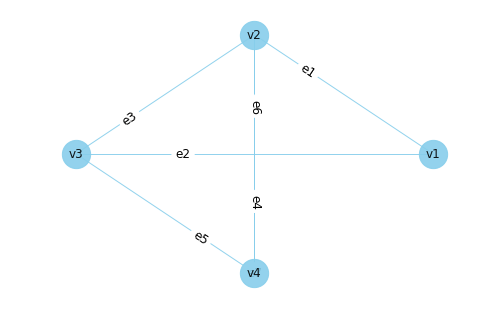

In [5]:
G = create_graph(vertex_pairs, labels)
plt.show()


-----------------------------------
Select from the following options: 
-----------------------------------

Press A to find adjacent vertices for a given pair of vertices.
Press E to find the edges for a given pair of vertices.
Press G to draw the graph.
Press J to print the Adjacency Matrix.
Press J2 for a matrix with all paths of length 2.
Press L to find all paths of a given length.
Press M to print a visual representation of the matrix.
Press P to find all the paths between 2 given vertices (vertices not repeated).
Press S to get statistics for your graph.
Press V to find the vertices for a given edge.
Make your selection: A

Please enter the vertex you would like to find the adjacent vertices for: v1
Adjacent vertices for v1 are:  ['v2', 'v3']

--------Press any key to continue or type \ to quit----------  

-----------------------------------
Select from the following options: 
-----------------------------------

Press A to find adjacent vertices for a given pair of vertices.


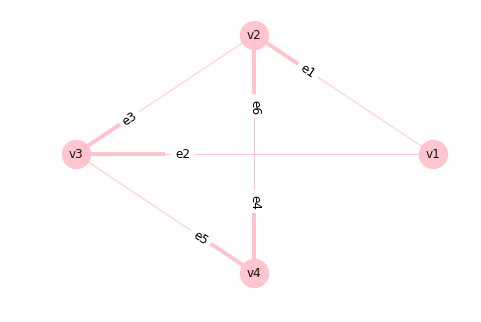


--------Press any key to continue or type \ to quit----------  

-----------------------------------
Select from the following options: 
-----------------------------------

Press A to find adjacent vertices for a given pair of vertices.
Press E to find the edges for a given pair of vertices.
Press G to draw the graph.
Press J to print the Adjacency Matrix.
Press J2 for a matrix with all paths of length 2.
Press L to find all paths of a given length.
Press M to print a visual representation of the matrix.
Press P to find all the paths between 2 given vertices (vertices not repeated).
Press S to get statistics for your graph.
Press V to find the vertices for a given edge.
Make your selection: J

Adjacency Matrix: 
[[0 1 1 0]
 [0 0 1 1]
 [0 0 0 1]
 [0 1 0 1]]

--------Press any key to continue or type \ to quit----------  J2

-----------------------------------
Select from the following options: 
-----------------------------------

Press A to find adjacent vertices for a given pair of 

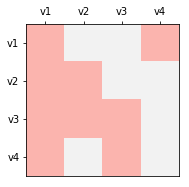


--------Press any key to continue or type \ to quit----------  

-----------------------------------
Select from the following options: 
-----------------------------------

Press A to find adjacent vertices for a given pair of vertices.
Press E to find the edges for a given pair of vertices.
Press G to draw the graph.
Press J to print the Adjacency Matrix.
Press J2 for a matrix with all paths of length 2.
Press L to find all paths of a given length.
Press M to print a visual representation of the matrix.
Press P to find all the paths between 2 given vertices (vertices not repeated).
Press S to get statistics for your graph.
Press V to find the vertices for a given edge.
Make your selection: P

Please enter the starting vertex: v1
Please enter the ending vertex: v4

Paths from v1 to v4 :
['v1', 'v2', 'v3', 'v4']
['v1', 'v2', 'v4']
['v1', 'v3', 'v4']

--------Press any key to continue or type \ to quit----------  

-----------------------------------
Select from the following options: 

In [6]:
main(G)